<a href="https://colab.research.google.com/github/praveenraghuvanshi/eva4-p2-group/blob/master/Session-3/Assignment-3/src/eva4p2s3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment - 3: Face Detection
---

Team Members

- Praveen Raghuvanshi (praveenraghuvanshi@gmail.com)
- Tusharkanta Biswal (Tusharkanta_biswal@stragure.com)
- Suman Kanukollu (sumankanukollu@gmail.com)
- Shubham Kothawade (kothawadeshub@gmail.com)

System Information
---

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!pip install torch==1.5.1+cu92 torchvision==0.6.1+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 604.8MB 27kB/s 
     |████████████████████████████████| 6.5MB 1.3MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [3]:
import torch
from IPython.display import Image, clear_output 

print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu92 CPU


Mount google drive
---

In [4]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Install libraries
---

Helper
- autotime : Prints cell execution time
- torchsummary : Prints model summary

In [5]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=6462f472c0631ba7f9444361aadb057afe11dc9da002de2f2f73143c7b4bf989
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [11]:
%cd '/content/drive/My Drive/eva-4/Phase-2/Session-3'

/content/drive/My Drive/eva-4/Phase-2/Session-3
time: 9.43 ms


Import all modules and libraries
---

In [22]:
import dlib
import cv2
import numpy as np
from renderFace import renderFace
import matplotlib.pyplot  as plt

%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

def writeLandmarksToFile(landmarks, landmarksFileName):
  print(landmarksFileName)
  with open(landmarksFileName, 'w') as f:
    for p in landmarks.parts():
      f.write("%s %s\n" %(int(p.x), int(p.y)))
    f.close()

MODEL_PATH = '/content/drive/My Drive/eva-4/Phase-2/Session-3/'
DATA_PATH = '/content/drive/My Drive/eva-4/Phase-2/Session-3/'
PREDICTOR_PATH = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"

time: 26.3 ms


In [13]:
print(PREDICTOR_PATH)

/content/drive/My Drive/eva-4/Phase-2/Session-3/shape_predictor_68_face_landmarks.dat
time: 1.33 ms


In [14]:
faceDetector = dlib.get_frontal_face_detector()

time: 760 ms


In [15]:
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

time: 2.73 s


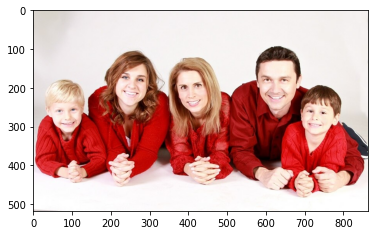

time: 914 ms


In [18]:
imageFileName = DATA_PATH + "images/family.jpg"
im = cv2.imread(imageFileName)

landmarksBasename = "results/family"

plt.imshow(im[:,:,::-1])
plt.show()

In [19]:
faceRects = faceDetector(im, 0)
print("Number of faces detected: ", len(faceRects))

landmarksAll = []

Number of faces detected:  5
time: 88.8 ms


In [23]:
for i in range(0, len(faceRects)):
  newRect = dlib.rectangle(int(faceRects[i].left()),
                           int(faceRects[i].top()),
                           int(faceRects[i].right()),
                           int(faceRects[i].bottom()))
  
  landmarks = landmarkDetector(im, newRect)

  if i == 0:
    print("Number of landmarks", len(landmarks.parts()))

  landmarksAll.append(landmarks)

  renderFace(im, landmarks)

  landmarksFileName = landmarksBasename + "_" + str(i) + ".txt"
  print("Saving landmark to: ", landmarksFileName)

  writeLandmarksToFile(landmarks, landmarksFileName)

Number of landmarks 68
Saving landmark to:  results/family_0.txt
results/family_0.txt
Saving landmark to:  results/family_1.txt
results/family_1.txt
Saving landmark to:  results/family_2.txt
results/family_2.txt
Saving landmark to:  results/family_3.txt
results/family_3.txt
Saving landmark to:  results/family_4.txt
results/family_4.txt
time: 73.4 ms


In [24]:
outputFileName = "results/familyLandmarks.jpg"
print("Saving output image to", outputFileName)

cv2.imwrite(outputFileName, im)

Saving output image to results/familyLandmarks.jpg


True

time: 41.6 ms


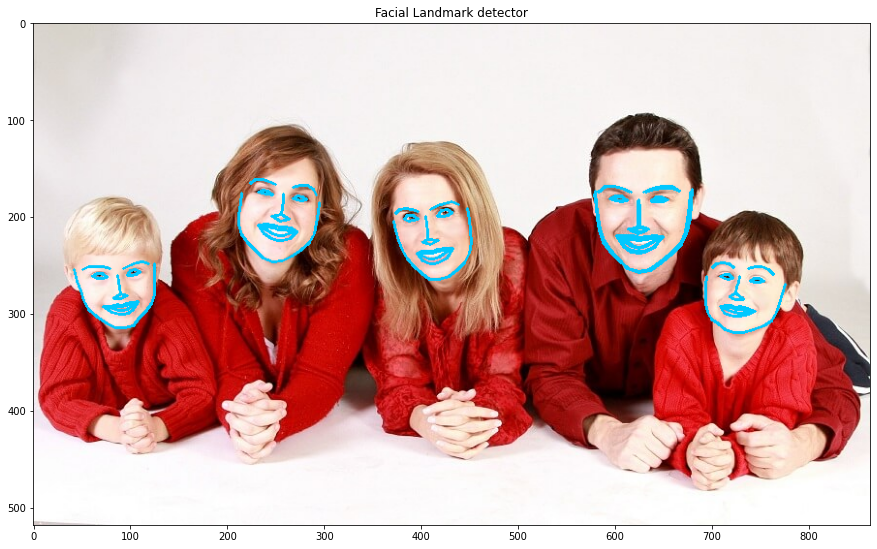

time: 515 ms


In [25]:
plt.figure(figsize=(15, 15))
plt.imshow(im[:,:,::-1])
plt.title("Facial Landmark detector")
plt.show()